The dataset used in this project is the [Home Equity dataset](https://www.kaggle.com/datasets/ajay1735/hmeq-data/data). This dataset contains baseline and loan performance information for 5,960 recent home equity loans.<br> It contains the following columns:
<ul>
<li>BAD: 1 = client defaulted on loan 0 = loan repaid</li>
<li>LOAN: Amount of the loan request</li>
<li>MORTDUE: Amount due on existing mortgage</li>
<li>VALUE: Value of current property</li>
<li>REASON: DebtCon = debt consolidation, HomeImp = home improvement</li>
<li>JOB: Six occupational categories</li>
<li>YOJ: Years at present job</li>
<li>DEROG: Number of major derogatory reports</li>
<li>DELINQ: Number of delinquent credit lines</li>
<li>CLAGE: Age of oldest trade line in months</li>
<li>NINQ: Number of recent credit lines</li>
<li>CLNO: Number of credit lines</li>
<li>DEBTINC: Debt-to-income ratio</li></ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/hmeq.csv')

## General dataset information

In [3]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

I'll have to cast these to the desired datatypes

In [5]:
df.shape

(5960, 13)

In [6]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

We see quite a few null values which will need to be imputed or taken care off. The DEBTINC column seems to have a disproportiante amount of null values. Given the description of the dataset this could be people that don't have any debt

### BAD column

In [7]:
df["BAD"].value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

Most loan prediction data is imbalanced and as to be expected this dataset is aswell. This is something we will need to keep in mind.

### LOAN column

In [8]:
print(f"lowest requested loan amount:{min(df['LOAN'])} \nhighest requested loan amount:{max(df['LOAN'])}")

lowest requested loan amount:1100 
highest requested loan amount:89900


C:\Users\Arne\AppData\Local\Temp\ipykernel_7840\3496338507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LOANBINS', data=df, palette='viridis')


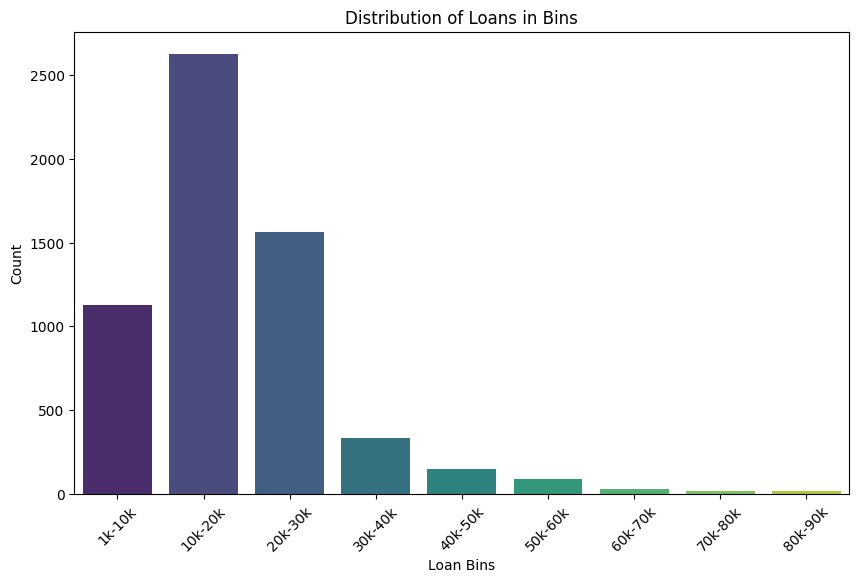

In [10]:
bins = [1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
labels = ['1k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k']

df['LOANBINS'] = pd.cut(df['LOAN'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='LOANBINS', data=df, palette='viridis')

plt.xlabel('Loan Bins')
plt.ylabel('Count')
plt.title('Distribution of Loans in Bins')
plt.xticks(rotation=45)

plt.show()

### MORTDUE column